In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('watch_test2_sample.csv')

In [3]:
df['uts'] = pd.to_datetime(df['uts'])
df.sort_values('uts', inplace = True)
df_copy = df.copy()

In [4]:
df['uts'].dtype

datetime64[ns, pytz.FixedOffset(420)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6276 entries, 0 to 6275
Data columns (total 13 columns):
uts            6276 non-null datetime64[ns, pytz.FixedOffset(420)]
accelerateX    6266 non-null float64
accelerateY    6262 non-null float64
accelerateZ    6266 non-null float64
compass        6272 non-null float64
gps.x          6276 non-null float64
gps.y          6276 non-null float64
gyro.x         6262 non-null float64
gyro.y         6268 non-null float64
gyro.z         6268 non-null float64
heartrate      6269 non-null float64
light          6276 non-null int64
pressure       6268 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(420)](1), float64(11), int64(1)
memory usage: 686.4 KB


In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 6273
Data columns (total 13 columns):
uts            271 non-null datetime64[ns, pytz.FixedOffset(420)]
accelerateX    267 non-null float64
accelerateY    267 non-null float64
accelerateZ    267 non-null float64
compass        270 non-null float64
gps.x          271 non-null float64
gps.y          271 non-null float64
gyro.x         268 non-null float64
gyro.y         269 non-null float64
gyro.z         269 non-null float64
heartrate      270 non-null float64
light          271 non-null int64
pressure       269 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(420)](1), float64(11), int64(1)
memory usage: 29.6 KB


In [7]:
df.median()

accelerateX       2.019315
accelerateY      -4.361242
accelerateZ       3.818775
compass          57.757585
gps.x             0.000000
gps.y             0.000000
gyro.x           -0.002128
gyro.y            0.000000
gyro.z           -0.002128
heartrate        78.500000
light           213.000000
pressure       1012.547060
dtype: float64

In [8]:
df = df.fillna(df.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 6273
Data columns (total 13 columns):
uts            271 non-null datetime64[ns, pytz.FixedOffset(420)]
accelerateX    271 non-null float64
accelerateY    271 non-null float64
accelerateZ    271 non-null float64
compass        271 non-null float64
gps.x          271 non-null float64
gps.y          271 non-null float64
gyro.x         271 non-null float64
gyro.y         271 non-null float64
gyro.z         271 non-null float64
heartrate      271 non-null float64
light          271 non-null int64
pressure       271 non-null float64
dtypes: datetime64[ns, pytz.FixedOffset(420)](1), float64(11), int64(1)
memory usage: 29.6 KB


In [9]:
# interpolate
df = df.set_index('uts').resample('30S').mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2018-11-18 08:18:30+07:00 to 2018-11-18 16:09:00+07:00
Freq: 30S
Data columns (total 12 columns):
accelerateX    194 non-null float64
accelerateY    194 non-null float64
accelerateZ    194 non-null float64
compass        194 non-null float64
gps.x          194 non-null float64
gps.y          194 non-null float64
gyro.x         194 non-null float64
gyro.y         194 non-null float64
gyro.z         194 non-null float64
heartrate      194 non-null float64
light          194 non-null float64
pressure       194 non-null float64
dtypes: float64(12)
memory usage: 95.7 KB


In [10]:
df.interpolate(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2018-11-18 08:18:30+07:00 to 2018-11-18 16:09:00+07:00
Freq: 30S
Data columns (total 12 columns):
accelerateX    942 non-null float64
accelerateY    942 non-null float64
accelerateZ    942 non-null float64
compass        942 non-null float64
gps.x          942 non-null float64
gps.y          942 non-null float64
gyro.x         942 non-null float64
gyro.y         942 non-null float64
gyro.z         942 non-null float64
heartrate      942 non-null float64
light          942 non-null float64
pressure       942 non-null float64
dtypes: float64(12)
memory usage: 95.7 KB


In [11]:
df.head(10)

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:18:30+07:00,-3.957379,-14.204506,2.303692,355.853000,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.00,12.00,1013.20100
2018-11-18 08:19:00+07:00,-0.038236,-1.156625,1.883101,355.853000,13.621482,100.369133,1.873036,2.521149,-1.295162,81.00,12.00,1013.16500
2018-11-18 08:19:30+07:00,1.906998,-4.361242,-4.358852,351.808530,13.621563,100.369088,-0.676847,-3.687540,1.123822,104.00,10.00,1013.21800
2018-11-18 08:20:00+07:00,-0.265259,-10.149148,3.042116,354.067300,13.621562,100.369103,-0.437397,1.558026,0.047890,122.00,10.00,1013.20795
2018-11-18 08:20:30+07:00,-5.344612,-12.436111,4.863084,354.412390,13.621525,100.369063,-1.815036,-0.483158,1.293033,100.75,10.00,1013.21000
2018-11-18 08:21:00+07:00,4.007563,0.776660,-0.186398,354.757500,13.621548,100.369107,1.741072,-0.721545,1.188739,73.00,9.00,1013.20900
2018-11-18 08:21:30+07:00,-15.109015,-4.383945,1.725379,354.799485,13.621538,100.369097,0.334167,-2.094395,-2.426965,29.00,10.50,1013.21850
2018-11-18 08:22:00+07:00,-0.810116,-7.988840,2.232000,354.684270,13.621537,100.369135,0.775820,0.000000,-1.232373,114.00,12.00,1013.22600
2018-11-18 08:22:30+07:00,-1.691923,-8.841971,7.915953,355.709350,13.621521,100.369134,0.538498,0.417708,1.790027,98.00,11.50,1013.21400


In [12]:
df.reset_index(inplace = True)

In [13]:
df

,uts,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
0,2018-11-18 08:18:30+07:00,-3.957379,-14.204506,2.303692,355.853000,13.621563,100.369093,-1.304740,-2.642471,3.315061,117.00,12.0,1013.20100
1,2018-11-18 08:19:00+07:00,-0.038236,-1.156625,1.883101,355.853000,13.621482,100.369133,1.873036,2.521149,-1.295162,81.00,12.0,1013.16500
2,2018-11-18 08:19:30+07:00,1.906998,-4.361242,-4.358852,351.808530,13.621563,100.369088,-0.676847,-3.687540,1.123822,104.00,10.0,1013.21800
3,2018-11-18 08:20:00+07:00,-0.265259,-10.149148,3.042116,354.067300,13.621562,100.369103,-0.437397,1.558026,0.047890,122.00,10.0,1013.20795
4,2018-11-18 08:20:30+07:00,-5.344612,-12.436111,4.863084,354.412390,13.621525,100.369063,-1.815036,-0.483158,1.293033,100.75,10.0,1013.21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2018-11-18 16:07:00+07:00,1.386038,-8.321011,-5.630184,225.219820,13.550667,100.279263,0.021285,-0.015963,0.012771,64.00,45.0,1008.65500
938,2018-11-18 16:07:30+07:00,3.291842,-3.279893,-3.091105,226.733025,13.551998,100.280178,-0.615654,0.058532,-0.008514,68.00,49.5,1008.64247
939,2018-11-18 16:08:00+07:00,0.399084,-8.364026,-5.357756,230.593200,13.553595,100.279633,-0.019156,-0.062789,0.100037,66.00,114.0,1008.72500
940,2018-11-18 16:08:30+07:00,0.745593,-8.820463,-5.106835,232.322420,13.553518,100.279728,0.013835,0.034055,0.017028,57.00,44.0,1008.69300


In [14]:
#mva
df.set_index('uts', inplace = True)
df = df.rolling(5).mean()
df = df.dropna()
# df.head(20)

In [15]:
#scaler
means = df.mean()
stds = df.std()

In [16]:
df = (df - means) / stds
df.head(10)

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:20:30+07:00,-0.019665,-2.046231,-0.269260,2.622079,2.687958,2.686200,-1.031225,-2.082494,5.132899,2.207696,-1.777350,0.359338
2018-11-18 08:21:00+07:00,0.392598,-0.999636,-0.382759,2.619368,2.687957,2.686200,0.052242,-0.298293,2.716399,1.637093,-1.784117,0.359551
2018-11-18 08:21:30+07:00,-0.387461,-1.225099,-0.389948,2.616760,2.687960,2.686200,-0.495170,-4.585316,1.430139,0.962743,-1.787501,0.360977
2018-11-18 08:22:00+07:00,-0.528098,-1.478526,-0.089536,2.623878,2.687958,2.686200,0.021578,-1.160245,-1.247604,1.092426,-1.782989,0.361190
2018-11-18 08:22:30+07:00,-0.601941,-1.387205,0.132614,2.627943,2.687956,2.686200,0.368726,-2.219398,0.732281,0.781188,-1.779606,0.361352
2018-11-18 08:23:00+07:00,-0.314483,-0.905728,0.197070,2.629045,2.687958,2.686200,1.878651,-1.640398,-0.860577,0.563969,-1.775658,0.362325
2018-11-18 08:23:30+07:00,-0.412694,-1.116917,0.416987,2.627186,2.687959,2.686200,2.796304,-1.097724,-4.492583,0.525065,-1.768891,0.364191
2018-11-18 08:24:00+07:00,0.326918,-1.143879,0.259156,2.625222,2.687959,2.686200,1.970643,1.010696,0.536954,0.953017,-1.772274,0.365697
2018-11-18 08:24:30+07:00,0.733367,-0.518159,0.390628,2.622573,2.687959,2.686200,2.287506,3.384029,5.954122,0.330541,-1.774530,0.367537


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019095DBDBC8>,
      dtype=object)

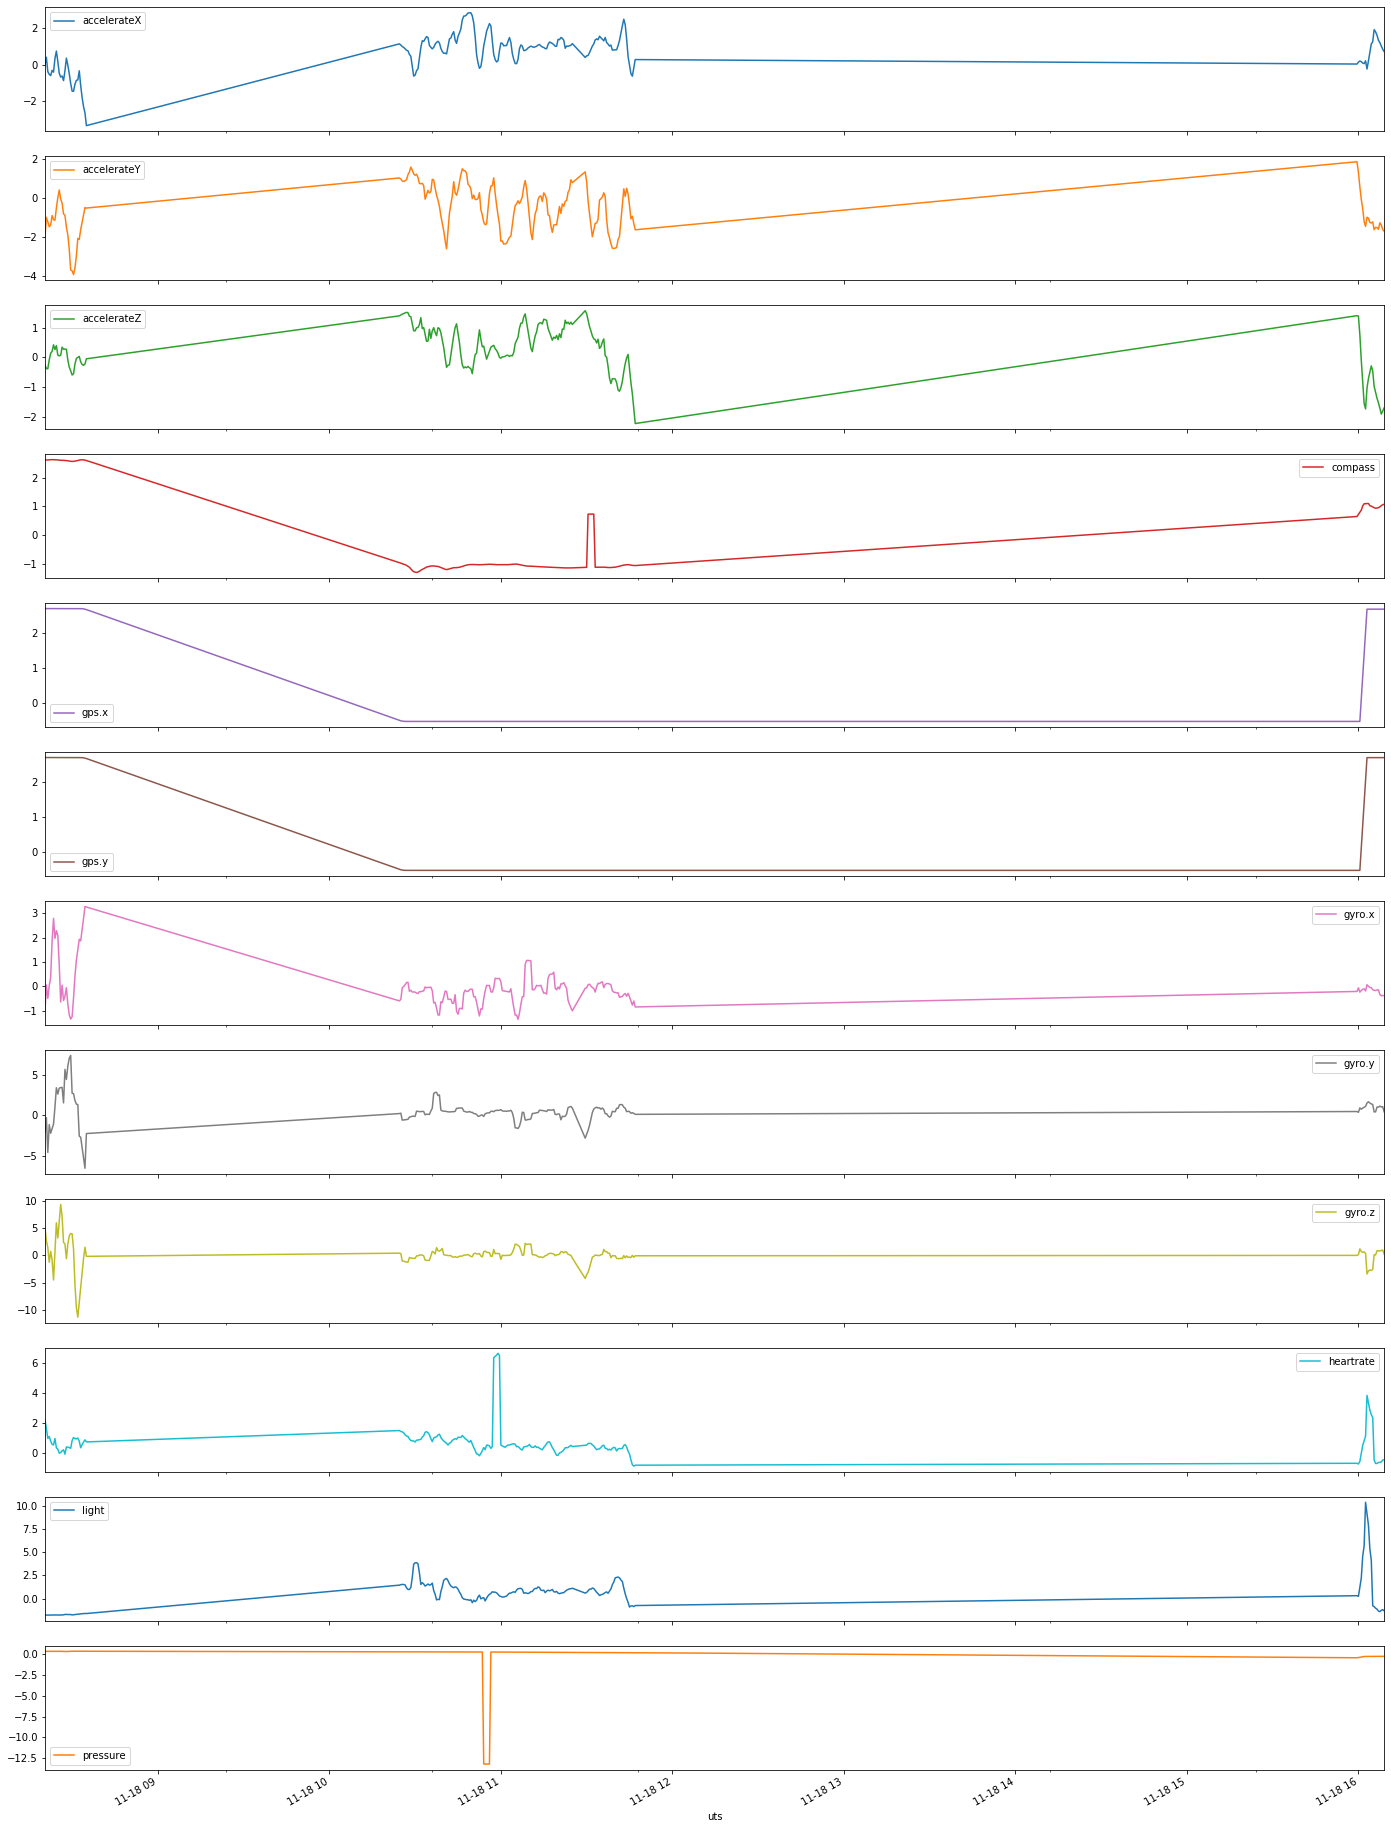

In [17]:
df.reset_index().plot(x='uts', subplots=True, figsize=(24, 36))

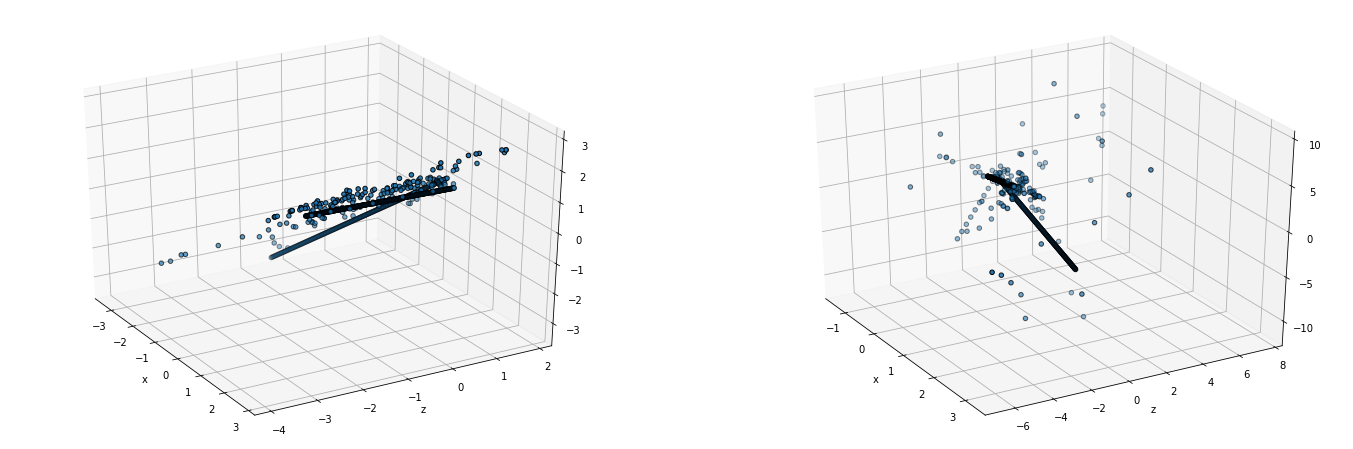

In [18]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(df['accelerateX'],df['accelerateY'],df['accelerateX'],s=20,edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylabel('z')
ax.view_init(30, -30)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(df['gyro.x'],df['gyro.y'],df['gyro.z'],s=20,edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylabel('z')
ax.view_init(30, -30)

In [19]:
map_im = plt.imread('map.png')
df.head(50)

,accelerateX,accelerateY,accelerateZ,compass,gps.x,gps.y,gyro.x,gyro.y,gyro.z,heartrate,light,pressure
uts,,,,,,,,,,,,
2018-11-18 08:20:30+07:00,-0.019665,-2.046231,-0.269260,2.622079,2.687958,2.686200,-1.031225,-2.082494,5.132899,2.207696,-1.777350,0.359338
2018-11-18 08:21:00+07:00,0.392598,-0.999636,-0.382759,2.619368,2.687957,2.686200,0.052242,-0.298293,2.716399,1.637093,-1.784117,0.359551
2018-11-18 08:21:30+07:00,-0.387461,-1.225099,-0.389948,2.616760,2.687960,2.686200,-0.495170,-4.585316,1.430139,0.962743,-1.787501,0.360977
2018-11-18 08:22:00+07:00,-0.528098,-1.478526,-0.089536,2.623878,2.687958,2.686200,0.021578,-1.160245,-1.247604,1.092426,-1.782989,0.361190
2018-11-18 08:22:30+07:00,-0.601941,-1.387205,0.132614,2.627943,2.687956,2.686200,0.368726,-2.219398,0.732281,0.781188,-1.779606,0.361352
2018-11-18 08:23:00+07:00,-0.314483,-0.905728,0.197070,2.629045,2.687958,2.686200,1.878651,-1.640398,-0.860577,0.563969,-1.775658,0.362325
2018-11-18 08:23:30+07:00,-0.412694,-1.116917,0.416987,2.627186,2.687959,2.686200,2.796304,-1.097724,-4.492583,0.525065,-1.768891,0.364191
2018-11-18 08:24:00+07:00,0.326918,-1.143879,0.259156,2.625222,2.687959,2.686200,1.970643,1.010696,0.536954,0.953017,-1.772274,0.365697
2018-11-18 08:24:30+07:00,0.733367,-0.518159,0.390628,2.622573,2.687959,2.686200,2.287506,3.384029,5.954122,0.330541,-1.774530,0.367537


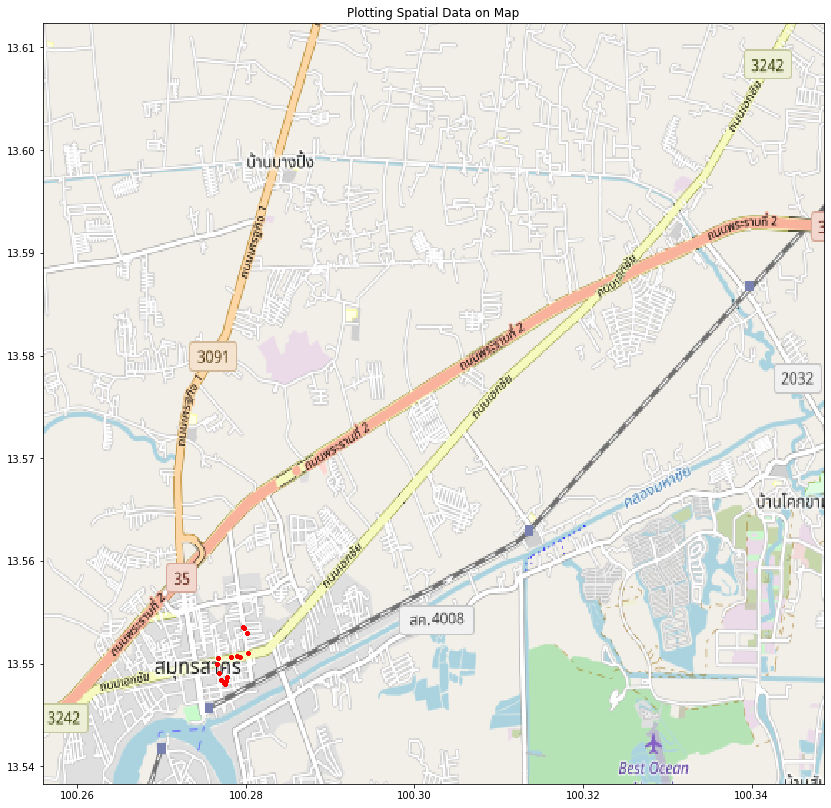

In [20]:
fig, ax = plt.subplots(figsize=(14,14))
BBox = [100.2559,100.3486,13.5383,13.6124]
ax.scatter(df_copy['gps.y'], df_copy['gps.x'], zorder=1, alpha=0.5, c='r', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_im, zorder=0, extent=BBox, aspect='auto')

In [21]:
columns = ['accelerateX', 'accelerateY', 'accelerateZ', 'compass', 'heartrate']
arr = df[columns].to_numpy()
arr

array([[-0.01966492, -2.04623124, -0.26926021,  2.62207931,  2.20769594],
       [ 0.39259776, -0.9996363 , -0.38275883,  2.61936761,  1.63709264],
       [-0.38746068, -1.22509913, -0.3899478 ,  2.61675984,  0.96274329],
       ...,
       [ 1.0033848 , -1.39171289, -1.91711424,  1.02410532, -0.61614197],
       [ 0.82848548, -1.62210068, -1.80906183,  1.05791806, -0.4864594 ],
       [ 0.70504168, -1.70941428, -1.70906974,  1.07549918, -0.47349115]])

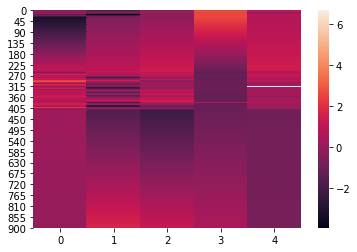

In [22]:
sns.heatmap(arr,  annot=False)

In [23]:
timestep = 3
stride = 1
data = []
for i in range(0, len(df)-timestep+1, stride):
    data.append(df[columns].iloc[i: i+timestep].to_numpy())

In [24]:
data = np.array(data)
data.shape

(936, 3, 5)

In [25]:
data

array([[[-0.01966492, -2.04623124, -0.26926021,  2.62207931,
          2.20769594],
        [ 0.39259776, -0.9996363 , -0.38275883,  2.61936761,
          1.63709264],
        [-0.38746068, -1.22509913, -0.3899478 ,  2.61675984,
          0.96274329]],

       [[ 0.39259776, -0.9996363 , -0.38275883,  2.61936761,
          1.63709264],
        [-0.38746068, -1.22509913, -0.3899478 ,  2.61675984,
          0.96274329],
        [-0.52809755, -1.47852567, -0.0895359 ,  2.62387818,
          1.09242586]],

       [[-0.38746068, -1.22509913, -0.3899478 ,  2.61675984,
          0.96274329],
        [-0.52809755, -1.47852567, -0.0895359 ,  2.62387818,
          1.09242586],
        [-0.60194118, -1.38720532,  0.13261424,  2.62794275,
          0.78118769]],

       ...,

       [[ 1.31889008, -1.6055311 , -1.53530901,  0.95534675,
         -0.65504674],
        [ 1.18771558, -1.27806325, -1.71399855,  0.98494846,
         -0.64207849],
        [ 1.0033848 , -1.39171289, -1.91711424,  1.024105

In [26]:
np.concatenate(data)

array([[-0.01966492, -2.04623124, -0.26926021,  2.62207931,  2.20769594],
       [ 0.39259776, -0.9996363 , -0.38275883,  2.61936761,  1.63709264],
       [-0.38746068, -1.22509913, -0.3899478 ,  2.61675984,  0.96274329],
       ...,
       [ 1.0033848 , -1.39171289, -1.91711424,  1.02410532, -0.61614197],
       [ 0.82848548, -1.62210068, -1.80906183,  1.05791806, -0.4864594 ],
       [ 0.70504168, -1.70941428, -1.70906974,  1.07549918, -0.47349115]])